In [2]:
import sys
sys.path.append('../..')

from src.var_like import VarLikeModel

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import IPython.display as display

import warnings
warnings.filterwarnings("ignore")

In [4]:
time_serires_data = pd.read_excel('../../data/Learning_data_part4.xlsx')
time_serires_data.head()

,t,TS_0_coord_0,TS_1_coord_0,TS_2_coord_0,TS_3_coord_0,TS_4_coord_0,TS_5_coord_0,TS_6_coord_0,TS_7_coord_0,TS_8_coord_0,...,TS_40_coord_0,TS_41_coord_0,TS_42_coord_0,TS_43_coord_0,TS_44_coord_0,TS_45_coord_0,TS_46_coord_0,TS_47_coord_0,TS_48_coord_0,TS_49_coord_0
0,0,777.679135,775.145167,779.134803,779.940318,778.026363,784.622101,777.189396,778.252745,779.079468,...,775.990131,776.544929,776.696670,775.502863,776.034399,779.124277,777.858835,772.493946,778.113188,781.139186
1,1,779.076261,776.546210,780.442133,780.675965,778.302130,784.288637,774.031459,777.958838,781.238591,...,775.690355,773.840369,775.158277,774.798338,774.527669,777.952551,782.555171,770.814566,777.173844,778.506020
2,2,780.463918,775.767970,778.328203,781.329404,777.655196,782.342678,775.171302,775.624617,779.597472,...,774.725358,774.788737,774.909912,776.028946,771.967426,774.937712,779.778453,773.937792,780.127145,774.693991
3,3,782.062161,774.817450,776.905897,779.395448,779.148350,782.584709,776.801345,776.009990,775.829146,...,781.270483,779.648506,776.739583,780.195431,774.619803,772.972471,783.537241,783.998422,776.423327,775.014931
4,4,781.943353,773.993488,775.856078,780.920122,780.324752,779.923217,777.294185,777.868083,775.931112,...,777.138367,772.004398,775.589954,780.118568,776.197269,774.892835,775.814396,780.589314,773.671797,774.153026


In [5]:
num_series = time_serires_data.shape[1] - 1
num_series

50

In [6]:
anwser_array = np.empty((num_series, 2))

In [7]:
for series_num in range(1, time_serires_data.shape[1]):
    cur_series = time_serires_data.iloc[:, series_num].values
    cur_series = cur_series.reshape((-1, 1))

    var_model = VarLikeModel(cur_series)
    window_size = 50

    cur_answer = var_model.find_discordance_point(window_size)
    anwser_array[series_num - 1] = cur_answer

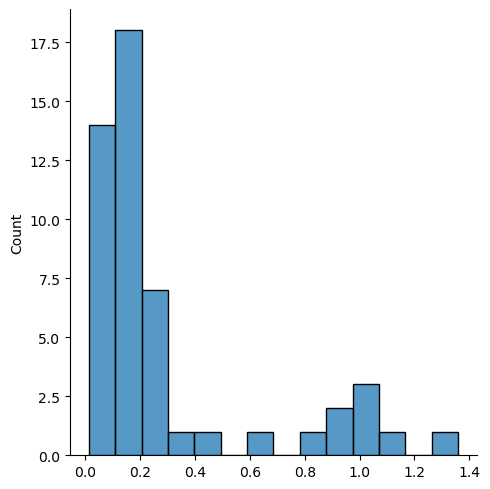

In [8]:
sns.displot(anwser_array[:, 1])

In [9]:
# transform confidence to be summed into 1
confidence = anwser_array[:, 1]
confidence -= 0.4

confidence[confidence < 0] = 1 / np.abs(confidence[confidence < 0])

confidence /= np.sum(confidence)

In [10]:
num_candies = 100000

confidence *= num_candies
confidence = confidence.astype(np.int32)

In [11]:
confidence.sum()

99974

In [12]:
discord_inds = anwser_array[:, 0].astype(np.int32)

In [13]:
answer_frame = pd.DataFrame(data=np.concatenate((discord_inds.reshape((-1, 1)), confidence.reshape((-1, 1))), axis=1), 
                            columns=['T', 'D'],
                )
answer_frame.head()

,T,D
0,-1,1576
1,-1,1514
2,-1,1499
3,-1,1531
4,-1,1421


In [14]:
answer_frame.to_excel('./answers_part4.xlsx')